In [1]:
%load_ext tensorboard

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
from datetime import datetime
from packaging import version
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [4]:
import tensorboard
tensorboard.__version__

'2.4.0'

In [5]:
print("Tensorflow version: ", tf.__version__)
print("Keras version: ", keras.__version__)
print(tf.config.list_physical_devices("GPU"))

gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)


Tensorflow version:  2.4.0
Keras version:  2.4.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [6]:
minst = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = minst.load_data()

In [7]:
X_train_full = X_train_full.reshape(*list(X_train_full.shape), 1)
y_train_full = y_train_full.reshape(*list(y_train_full.shape), 1)
X_test = X_test.reshape(*list(X_test.shape), 1)
y_test = y_test.reshape(*list(y_test.shape), 1)

In [8]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [9]:
X_valid = tf.keras.layers.ZeroPadding2D(padding=2, dtype='float64')(X_valid)
X_train = tf.keras.layers.ZeroPadding2D(padding=2, dtype='float64')(X_train)
X_test = tf.keras.layers.ZeroPadding2D(padding=2, dtype='float64')(X_test)

In [10]:
class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [11]:
lenet5 = keras.models.Sequential()

In [12]:
lenet5.add(keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
lenet5.add(keras.layers.AveragePooling2D())
lenet5.add(keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
lenet5.add(keras.layers.AveragePooling2D())
lenet5.add(keras.layers.Flatten())
lenet5.add(keras.layers.Dense(units=120, activation='relu'))
lenet5.add(keras.layers.Dense(units=84, activation='relu'))
lenet5.add(keras.layers.Dense(units=10, activation = 'softmax'))

In [13]:
lenet5.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [14]:
lenet5.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd", metrics=["accuracy"])

In [15]:
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [16]:
history = lenet5.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid), callbacks=[tensorboard_callback])

Epoch 1/50
1719/1719 [==============================] - 7s 3ms/step - loss: 1.3078 - accuracy: 0.5843 - val_loss: 0.2577 - val_accuracy: 0.9246
Epoch 2/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2299 - accuracy: 0.9295 - val_loss: 0.1533 - val_accuracy: 0.9544
Epoch 3/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1591 - accuracy: 0.9531 - val_loss: 0.1226 - val_accuracy: 0.9656
Epoch 4/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1187 - accuracy: 0.9634 - val_loss: 0.0957 - val_accuracy: 0.9748
Epoch 5/50
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0976 - accuracy: 0.9698 - val_loss: 0.0876 - val_accuracy: 0.9746
Epoch 6/50
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0872 - accuracy: 0.9732 - val_loss: 0.0729 - val_accuracy: 0.9804
Epoch 7/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0782 - accuracy: 0.9755 - val_loss: 0.0693 - val_accuracy:

In [17]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 10527), started 3:16:59 ago. (Use '!kill 10527' to kill it.)

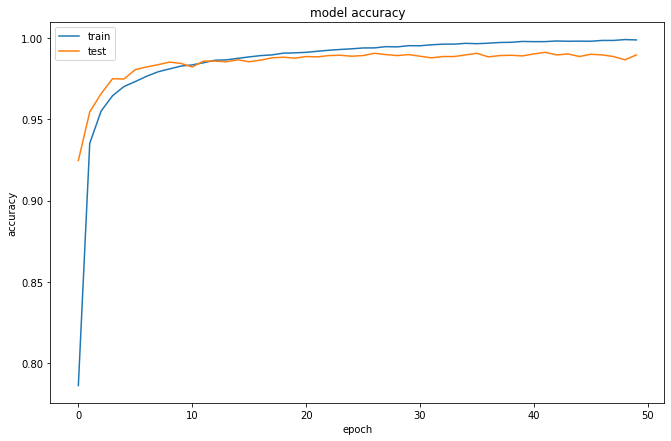

In [18]:
plt.figure(figsize=(11,7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [19]:
plt.figure(figsize=(11,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
from keras.models import Model
model_cov1 = Model(inputs=lenet5.inputs, outputs=lenet5.layers[0].output)
model_cov1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 6)         156       
Total params: 156
Trainable params: 156
Non-trainable params: 0
_________________________________________________________________


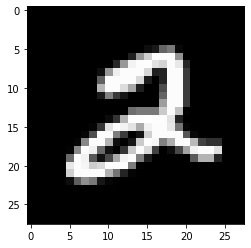

In [21]:
import numpy as np
features = model_cov1.predict(X_valid[5:6])
image = X_train_full[5]

plt.imshow(image.reshape((28,28)), cmap='gray')
plt.show()

In [22]:
plt.figure(figsize=(11,7))
for ix in range(6):
    ax = plt.subplot(2, 3, ix+1)
    ax.set_xticks([])
    ax.set_yticks([])
    # plot filter channel in grayscale
    plt.imshow(features[0, :, :, ix-1], cmap='gray')
plt.show()

In [23]:
model_cov1 = Model(inputs=lenet5.inputs, outputs=lenet5.layers[3].output)
model_cov1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
Total params: 2,572
Trainable params: 2,572
Non-trainable params: 0
_________________________________________________________________


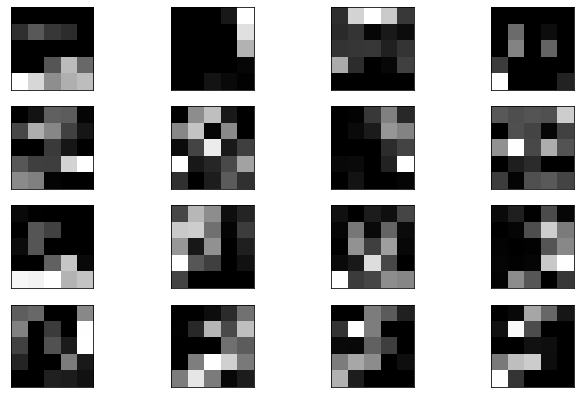

In [24]:
features = model_cov1.predict(X_valid[5:6])
plt.figure(figsize=(11,7))
for ix in range(16):
    ax = plt.subplot(4, 4, ix+1)
    ax.set_xticks([])
    ax.set_yticks([])
    # plot filter channel in grayscale
    plt.imshow(features[0, :, :, ix-1], cmap='gray')
plt.show()

In [49]:
from keras import backend as K
for w in lenet5.trainable_weights:
    print(K.eval(w))

[[[[-1.87188461e-01 -8.70158821e-02 -7.75175765e-02  1.47044305e-02
    -1.86003968e-01 -1.59046844e-01]]

  [[ 4.22437899e-02  2.33907267e-01  1.57832369e-01  7.05622137e-02
     1.34455264e-01  8.12145919e-02]]

  [[-1.32866725e-01  2.56202035e-02  1.58535913e-01  3.17488104e-01
     5.05992472e-01  1.22699760e-01]]

  [[ 1.49826437e-01  1.53080434e-01  4.68817465e-02  3.93188894e-01
     7.05447972e-01  1.94163591e-01]]

  [[-1.31599819e-02 -5.63881733e-02  1.95643947e-01  1.84009686e-01
     4.29817259e-01  2.49079764e-01]]]


 [[[ 1.05447352e-01  1.25769854e-01  2.55581051e-01 -2.25434512e-01
     1.08400621e-01  6.54639825e-02]]

  [[-1.65160120e-01  1.99758038e-01  5.82192205e-02  2.18894064e-01
     9.61310744e-01  1.65908337e-01]]

  [[-2.49424562e-01  1.92817613e-01  7.90171623e-02  5.13087630e-01
     1.35829234e+00  4.55166787e-01]]

  [[-1.08022995e-01 -8.73221159e-02  2.46845365e-01  4.64567751e-01
     1.08364475e+00  5.78925014e-01]]

  [[-1.69639103e-02  2.60398895e-01

In [26]:
cw1 = np.array(lenet5.layers[0].get_weights(), dtype="object")
print(cw1[0].shape)

(5, 5, 1, 6)


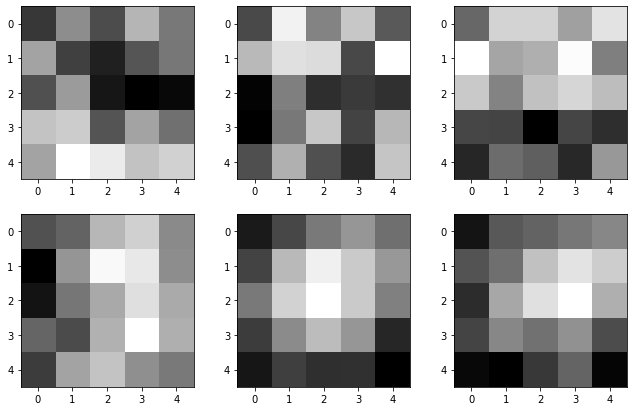

In [27]:
plt.figure(figsize=(11, 7))
for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    ax.imshow(cw1[0][:,:,:,i].reshape(5,5), cmap='gray')
plt.show()

In [28]:
lenet5.save('kb_minst_lenet5_model.h5')

In [29]:
print(lenet5.evaluate(X_test,y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0490 - accuracy: 0.9869
[0.04901135712862015, 0.9868999719619751]


In [30]:
y_model = lenet5.predict(X_test)

In [31]:
y_model[0]

array([9.7363012e-12, 4.2986604e-11, 3.4207031e-09, 7.3706843e-08,
       7.1453626e-10, 3.9279750e-11, 6.4299298e-19, 9.9999988e-01,
       4.3915930e-12, 1.2306818e-09], dtype=float32)

In [33]:
np.argmax(y_model[0])

7

In [40]:
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

(55000, 32, 32, 1)
(10000, 32, 32, 1)
(5000, 32, 32, 1)


In [35]:
model_label = [np.argmax(y) for y in y_model]

In [37]:
model_label[555]

4

In [41]:
confusion = tf.math.confusion_matrix(y_test, model_label)

In [44]:
plt.figure(figsize=(11,7))
plt.imshow(confusion, cmap='gray')

In [45]:
print(confusion)

tf.Tensor(
[[ 974    0    0    0    0    0    2    1    3    0]
 [   0 1130    1    0    0    1    2    0    0    1]
 [   4    1 1020    0    3    0    0    2    2    0]
 [   1    0    2  993    0    6    0    4    2    2]
 [   0    0    0    0  976    0    2    2    0    2]
 [   2    0    0    7    0  875    2    2    3    1]
 [   2    2    0    0    1    5  947    0    1    0]
 [   0    3    4    1    1    0    0 1015    2    2]
 [   1    0    1    4    3    3    1    2  955    4]
 [   2    2    0    4   10    3    0    4    0  984]], shape=(10, 10), dtype=int32)


In [48]:
result = lenet5.evaluate(X_test, y_test)
dict(zip(lenet5.metrics_names, result))

313/313 [==============================] - 0s 1ms/step - loss: 0.0490 - accuracy: 0.9869


{'loss': 0.04901135712862015, 'accuracy': 0.9868999719619751}